# StableMotif of the compartmentalized EMT model of Mendik et al.

The code is a direct application of the Tutorial notebook form: https://github.com/jcrozum/StableMotifs

In [1]:
import StableMotifs as sm
import PyBoolNet
import StableMotifs.Export as ex
import PyBoolNet
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
/home/david/anaconda2/envs/python_3_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Read in a Boolean model:

In [2]:
with open('EMT30.booleannet', 'r') as f:
    rules=f.read()

print(rules)

AKT *= SMAD_nuc or SOS_GRB2 or not GSK3B_cyto or Bcatenin_nuc
AXIN2_cyto *= AXIN2_cyto or Bcatenin_nuc or not AXIN2_nuc
AXIN2_nuc *= not AXIN2_cyto
Bcatenin_memb *= Ecadherin and not Bcatenin_nuc
Bcatenin_nuc *= (not Dest_compl or NOTCH_ic_cyto) and not Bcatenin_memb and ( not (GLI_cyto and not GLI_nuc) or not (AXIN2_nuc and GSK3B_nuc) or Ecadherin_CTF or not Ecadherin)
Dest_compl *= (GSK3B_cyto and AXIN2_cyto and Bcatenin_nuc) or (GSK3B_cyto and Dest_compl)
Ecadherin *= Bcatenin_memb and (not SNAI1_nuc or (not NOTCH_ic_nuc and not SMAD_nuc) or not ZEB1_nuc or not ZEB2 or not TWIST1_nuc or not SNAI2_nuc)
Ecadherin_CTF *= not Ecadherin
GLI_cyto *= Bcatenin_nuc or SMAD_nuc or GLI_nuc
GLI_nuc *= (SMAD_nuc and (AKT or MEK or GSK3B_cyto)) and GLI_cyto
GSK3B_cyto *= not GLI_nuc and not AKT
GSK3B_nuc *= not AKT and not AXIN2_cyto
MEK *= SOS_GRB2 or not GSK3B_cyto or Bcatenin_nuc or not (not MEK or not SNAI1_nuc) or Ecadherin_CTF
miR200 *= not SNAI1_nuc and not ZEB1_nuc and not ZEB2
NOTCH *= S

In [3]:
#format the rules to be PyBoolNet compatible 
rules_pbn = sm.Format.booleannet2bnet(rules)
primes = PyBoolNet.FileExchange.bnet2primes(rules_pbn)


## Generating the Attractor repertoire

In [4]:
#explanation of the parameter
max_simulate_size=20

In [5]:
ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)

### What do we know about the attractors?

In [6]:
#Summary of the attractors:
ar.summary()

There are 7 attractors.
{'AKT': 1, 'AXIN2_cyto': 1, 'AXIN2_nuc': 0, 'Bcatenin_memb': 0, 'Bcatenin_nuc': 1, 'Dest_compl': 0, 'Ecadherin': 0, 'Ecadherin_CTF': 1, 'GLI_cyto': 1, 'GLI_nuc': 1, 'GSK3B_cyto': 0, 'GSK3B_nuc': 0, 'MEK': 1, 'NOTCH': 1, 'NOTCH_ic_cyto': 1, 'NOTCH_ic_nuc': 1, 'SMAD_cyto': 1, 'SMAD_nuc': 1, 'SNAI1_cyto': 1, 'SNAI1_nuc': 1, 'SNAI2_cyto': 1, 'SNAI2_nuc': 1, 'SOS_GRB2': 0, 'TGFBR': 1, 'TGFBR_icd': 1, 'TWIST1_nuc': 1, 'ZEB1_cyto': 1, 'ZEB1_nuc': 1, 'ZEB2': 1, 'miR200': 0}

{'AKT': 0, 'AXIN2_cyto': 1, 'AXIN2_nuc': 0, 'Bcatenin_memb': 0, 'Bcatenin_nuc': 0, 'Dest_compl': 1, 'Ecadherin': 0, 'Ecadherin_CTF': 1, 'GLI_cyto': 0, 'GLI_nuc': 0, 'GSK3B_cyto': 1, 'GSK3B_nuc': 0, 'MEK': 1, 'NOTCH': 0, 'NOTCH_ic_cyto': 0, 'NOTCH_ic_nuc': 0, 'SMAD_cyto': 0, 'SMAD_nuc': 0, 'SNAI1_cyto': 0, 'SNAI1_nuc': 0, 'SNAI2_cyto': 0, 'SNAI2_nuc': 0, 'SOS_GRB2': 0, 'TGFBR': 0, 'TGFBR_icd': 0, 'TWIST1_nuc': 0, 'ZEB1_cyto': 0, 'ZEB1_nuc': 0, 'ZEB2': 0, 'miR200': 1}

{'AKT': 0, 'AXIN2_cyto': 1, 'AXI

If we want the attractors in a DataFrame:

In [7]:
df=ex.attractor_dataframe(ar)
df

,AKT,AXIN2_cyto,AXIN2_nuc,Bcatenin_memb,Bcatenin_nuc,Dest_compl,Ecadherin,Ecadherin_CTF,GLI_cyto,GLI_nuc,...,SNAI2_cyto,SNAI2_nuc,SOS_GRB2,TGFBR,TGFBR_icd,TWIST1_nuc,ZEB1_cyto,ZEB1_nuc,ZEB2,miR200
0,1,1,0,0,1,0,0,1,1,1,...,1,1,0,1,1,1,1,1,1,0
1,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df.to_excel('EMT30_attractors.xlsx')

To access the attractors as the dictionaries:

In [9]:
for a in ar.attractors:
    print(a.attractor_dict)

{'AKT': 1, 'AXIN2_cyto': 1, 'AXIN2_nuc': 0, 'Bcatenin_memb': 0, 'Bcatenin_nuc': 1, 'Dest_compl': 0, 'Ecadherin': 0, 'Ecadherin_CTF': 1, 'GLI_cyto': 1, 'GLI_nuc': 1, 'GSK3B_cyto': 0, 'GSK3B_nuc': 0, 'MEK': 1, 'NOTCH': 1, 'NOTCH_ic_cyto': 1, 'NOTCH_ic_nuc': 1, 'SMAD_cyto': 1, 'SMAD_nuc': 1, 'SNAI1_cyto': 1, 'SNAI1_nuc': 1, 'SNAI2_cyto': 1, 'SNAI2_nuc': 1, 'SOS_GRB2': 0, 'TGFBR': 1, 'TGFBR_icd': 1, 'TWIST1_nuc': 1, 'ZEB1_cyto': 1, 'ZEB1_nuc': 1, 'ZEB2': 1, 'miR200': 0}
{'AKT': 0, 'AXIN2_cyto': 1, 'AXIN2_nuc': 0, 'Bcatenin_memb': 0, 'Bcatenin_nuc': 0, 'Dest_compl': 1, 'Ecadherin': 0, 'Ecadherin_CTF': 1, 'GLI_cyto': 0, 'GLI_nuc': 0, 'GSK3B_cyto': 1, 'GSK3B_nuc': 0, 'MEK': 1, 'NOTCH': 0, 'NOTCH_ic_cyto': 0, 'NOTCH_ic_nuc': 0, 'SMAD_cyto': 0, 'SMAD_nuc': 0, 'SNAI1_cyto': 0, 'SNAI1_nuc': 0, 'SNAI2_cyto': 0, 'SNAI2_nuc': 0, 'SOS_GRB2': 0, 'TGFBR': 0, 'TGFBR_icd': 0, 'TWIST1_nuc': 0, 'ZEB1_cyto': 0, 'ZEB1_nuc': 0, 'ZEB2': 0, 'miR200': 1}
{'AKT': 0, 'AXIN2_cyto': 1, 'AXIN2_nuc': 0, 'Bcatenin_memb

## Generating and plotting the Suuccession Diagrams

If we want to add the attractors as nodes of the succession diagram connected to the terminal nodes of the succession diagram we set:


In [10]:
include_attractors_in_diagram=True

### Reduced network based succession diagram

In [11]:
GR=ex.networkx_succession_diagram_reduced_network_based(ar,include_attractors_in_diagram=include_attractors_in_diagram)

In [12]:
for n in GR.nodes(data=True):
    print(n)

(0, {'label': '', 'virtual_nodes': []})
(1, {'label': '{AXIN2_cyto: 1}', 'virtual_nodes': [{'AXIN2_cyto': 1}]})
(2, {'label': '{AXIN2_cyto: 1}, {Bcatenin_memb: 0, Ecadherin: 0}', 'virtual_nodes': [{'AXIN2_cyto': 1}, {'Bcatenin_memb': 0, 'Ecadherin': 0}]})
(3, {'label': '{AXIN2_cyto: 1}, {Bcatenin_memb: 0, Ecadherin: 0}, {AKT: 1, GSK3B_cyto: 0}', 'virtual_nodes': [{'AXIN2_cyto': 1}, {'Bcatenin_memb': 0, 'Ecadherin': 0}, {'AKT': 1, 'GSK3B_cyto': 0}]})
(4, {'label': '{AXIN2_cyto: 1}, {Bcatenin_memb: 0, Ecadherin: 0}, {Bcatenin_nuc: 1, NOTCH: 1, NOTCH_ic_cyto: 1}', 'virtual_nodes': [{'AXIN2_cyto': 1}, {'Bcatenin_memb': 0, 'Ecadherin': 0}, {'Bcatenin_nuc': 1, 'NOTCH': 1, 'NOTCH_ic_cyto': 1}]})
(5, {'label': '{AXIN2_cyto: 1}, {Bcatenin_memb: 0, Ecadherin: 0}, {AKT: 1, SMAD_cyto: 1, SMAD_nuc: 1, SNAI1_cyto: 1, SNAI1_nuc: 1, TGFBR: 1, ZEB1_cyto: 1, ZEB1_nuc: 1, miR200: 0}', 'virtual_nodes': [{'AXIN2_cyto': 1}, {'Bcatenin_memb': 0, 'Ecadherin': 0}, {'AKT': 1, 'SMAD_cyto': 1, 'SMAD_nuc': 1, 'SNA

We can plot the succession diagram using matplotlib and networkx. The following parameters can be adjusted:
* __G__ -- (networkx DiGraph) of the succession diagram <br>
* __fig_dimensions__ -- ((float, float)) the width/height dimensions in inches of the figure. By default it's propotional to the number of nodes in the succession diagram <br>
* __pos__ (dict) -- the layout of dictionary of nodes (key) and coordinate tuples (value). By default the "pydot" hierarchical layout is generated by the function
* __detailed_labels__ -- (bool) -- if True (default) the plot will show the corresponding node states to each succession node and attractor. If False the labels are generated based on the motif reduction unique IDs. In this case the attractors are marked with an "A" prefix. 
* __node_size__= (int or list of ints) -- if int, all nodes are of the same size (nr of pixels), if iterable, the nodes in the corresponding order (as returned by G.nodes()) will be sized accordingly. The number of ints in the list has to be equal to the number of nodes. Default is 50* the number of nodes 
* __node_color__ -- (str or list of str) default='grey'. Same system as node_size, all colors codes compatible with matplotlib work.
* __font_size__= (int) default=12
* __font_color__=(str or list of str) default='black'. Same system as node_size, all colors codes compatible with matplotlib work.

In [13]:
#pos= nx.layout.kamada_kawai_layout(GR)

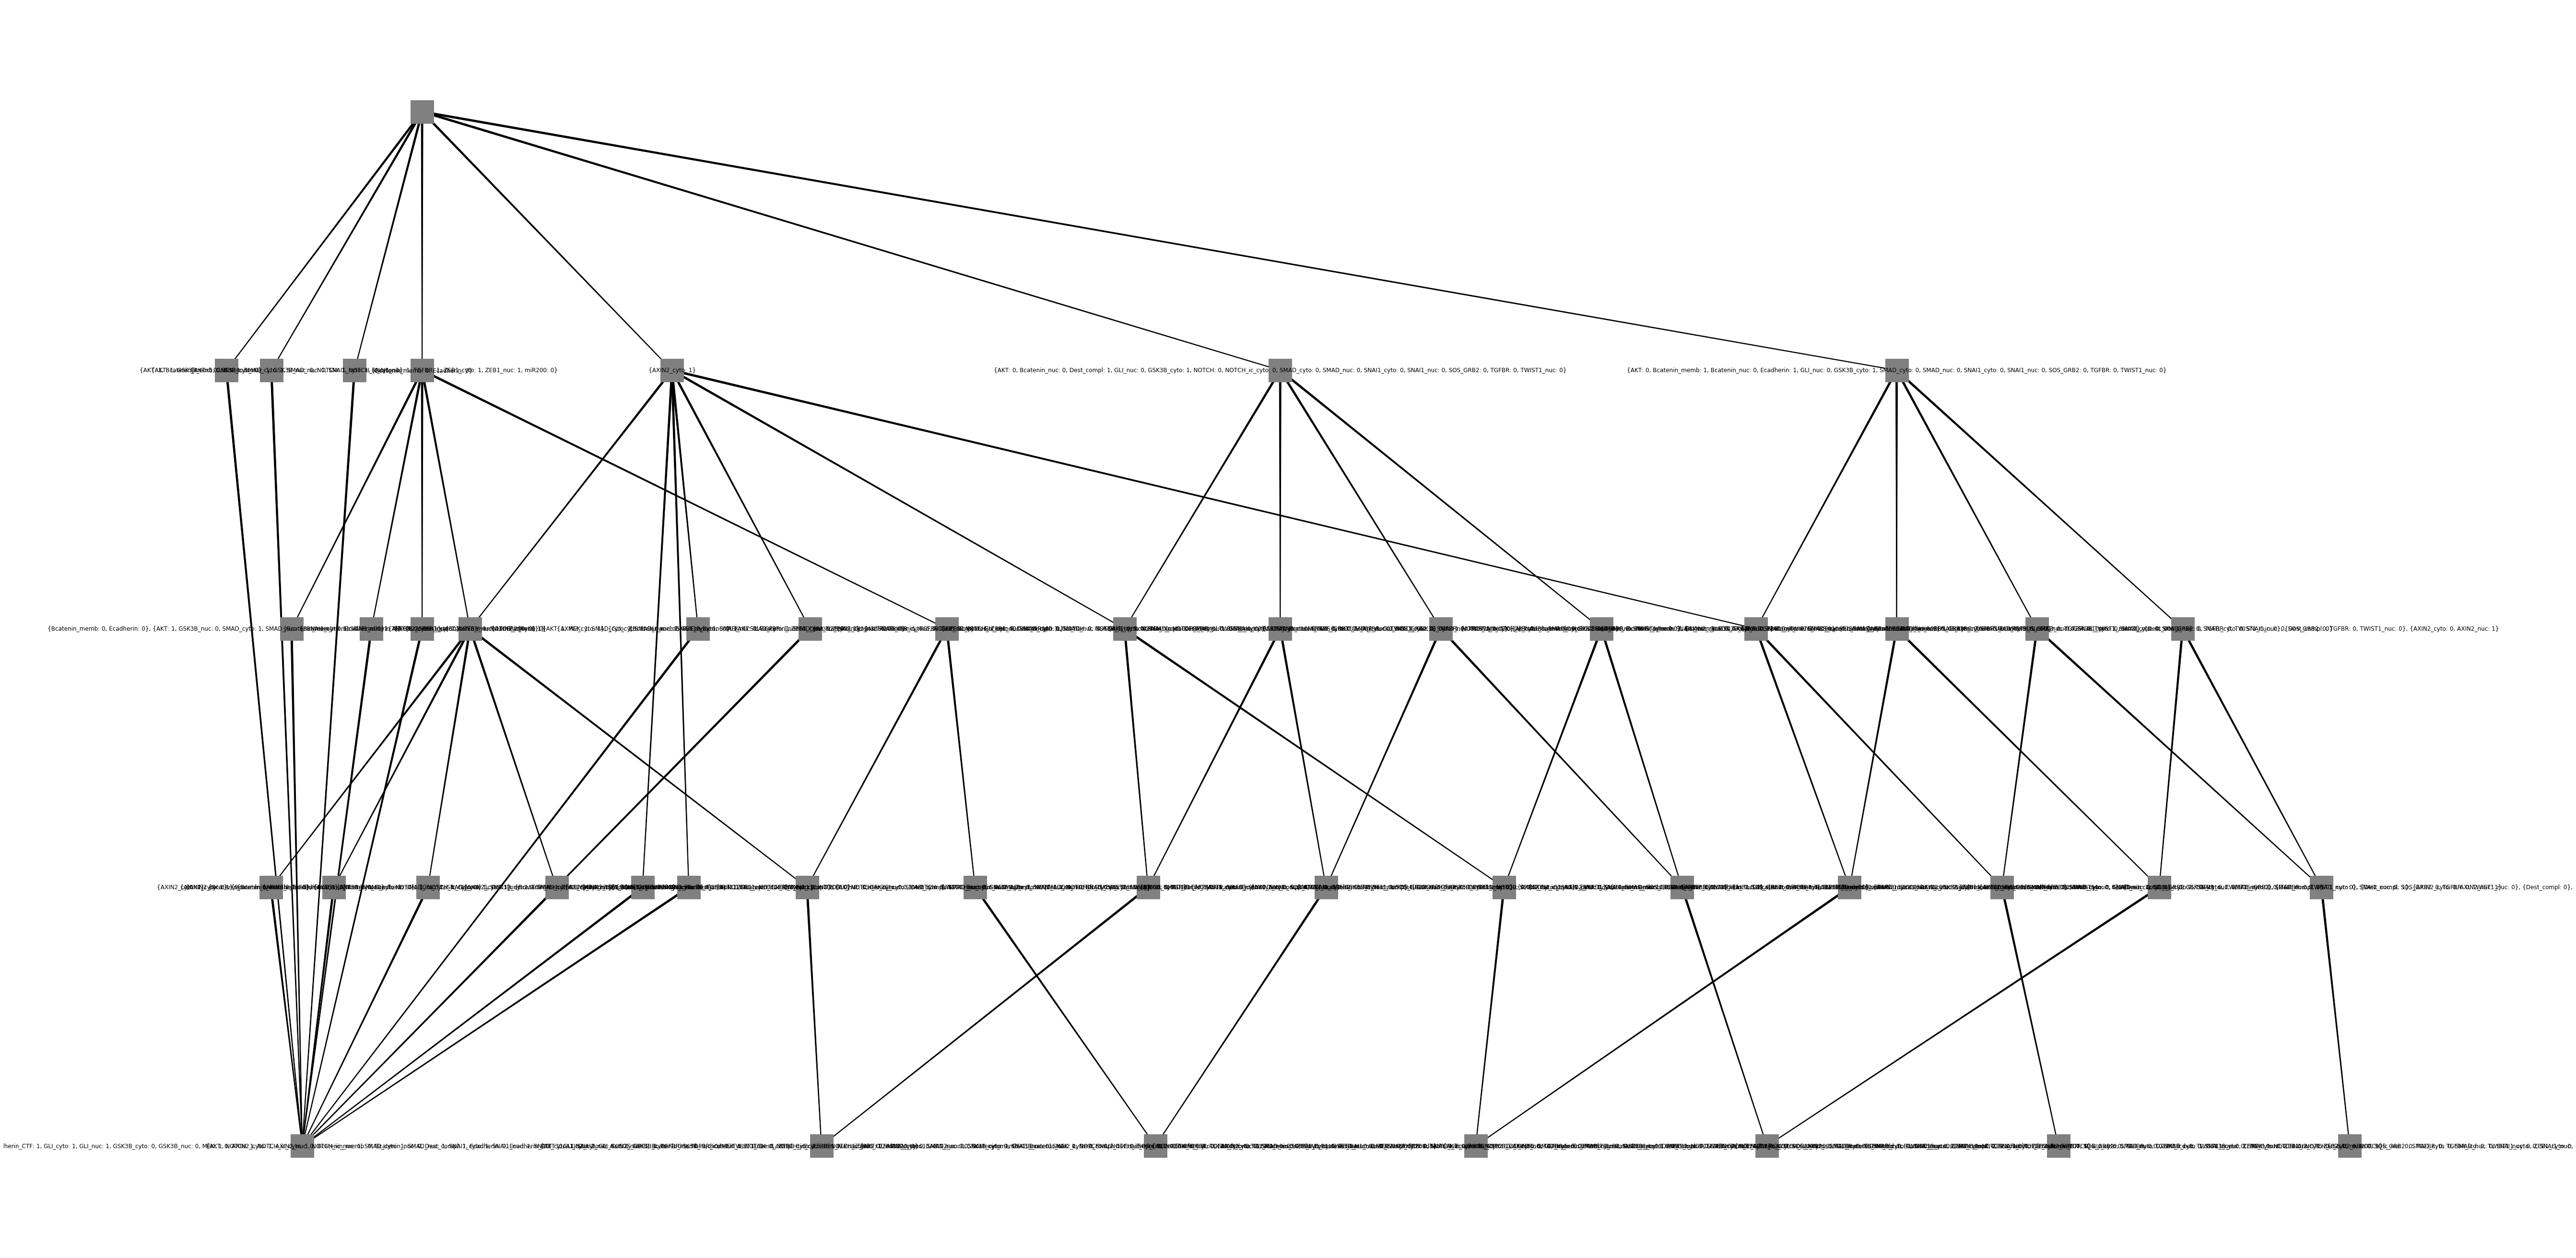

In [14]:
ex.plot_nx_succession_diagram(GR)

### Motif based succession diagram

In [15]:
GM=ex.networkx_succession_diagram_motif_based(ar,include_attractors_in_diagram=True)

In [16]:
for n in GM.nodes(data=True):
    print(n)

((0, 1), {'label': '{AXIN2_cyto: 1}', 'virtual_nodes': {'AXIN2_cyto': 1}})
((1, 2), {'label': '{Ecadherin: 0, Bcatenin_memb: 0}', 'virtual_nodes': {'Ecadherin': 0, 'Bcatenin_memb': 0}})
((1, 8), {'label': '{AKT: 1, GSK3B_cyto: 0}', 'virtual_nodes': {'AKT': 1, 'GSK3B_cyto': 0}})
((1, 9), {'label': '{NOTCH_ic_cyto: 1, NOTCH: 1, Bcatenin_nuc: 1, Bcatenin_memb: 0}', 'virtual_nodes': {'NOTCH_ic_cyto': 1, 'NOTCH': 1, 'Bcatenin_nuc': 1, 'Bcatenin_memb': 0}})
((1, 10), {'label': '{ZEB1_nuc: 1, MEK: 1, ZEB1_cyto: 1, miR200: 0, SMAD_cyto: 1, SMAD_nuc: 1, SNAI1_cyto: 1, TGFBR: 1, AKT: 1, SNAI1_nuc: 1}', 'virtual_nodes': {'ZEB1_nuc': 1, 'MEK': 1, 'ZEB1_cyto': 1, 'miR200': 0, 'SMAD_cyto': 1, 'SMAD_nuc': 1, 'SNAI1_cyto': 1, 'TGFBR': 1, 'AKT': 1, 'SNAI1_nuc': 1}})
((1, 11), {'label': '{ZEB1_nuc: 1, GSK3B_cyto: 0, MEK: 1, ZEB1_cyto: 1, miR200: 0, SMAD_cyto: 1, SMAD_nuc: 1, SNAI1_cyto: 1, TGFBR: 1, GLI_cyto: 1, GLI_nuc: 1, SNAI1_nuc: 1}', 'virtual_nodes': {'ZEB1_nuc': 1, 'GSK3B_cyto': 0, 'MEK': 1, 'ZEB

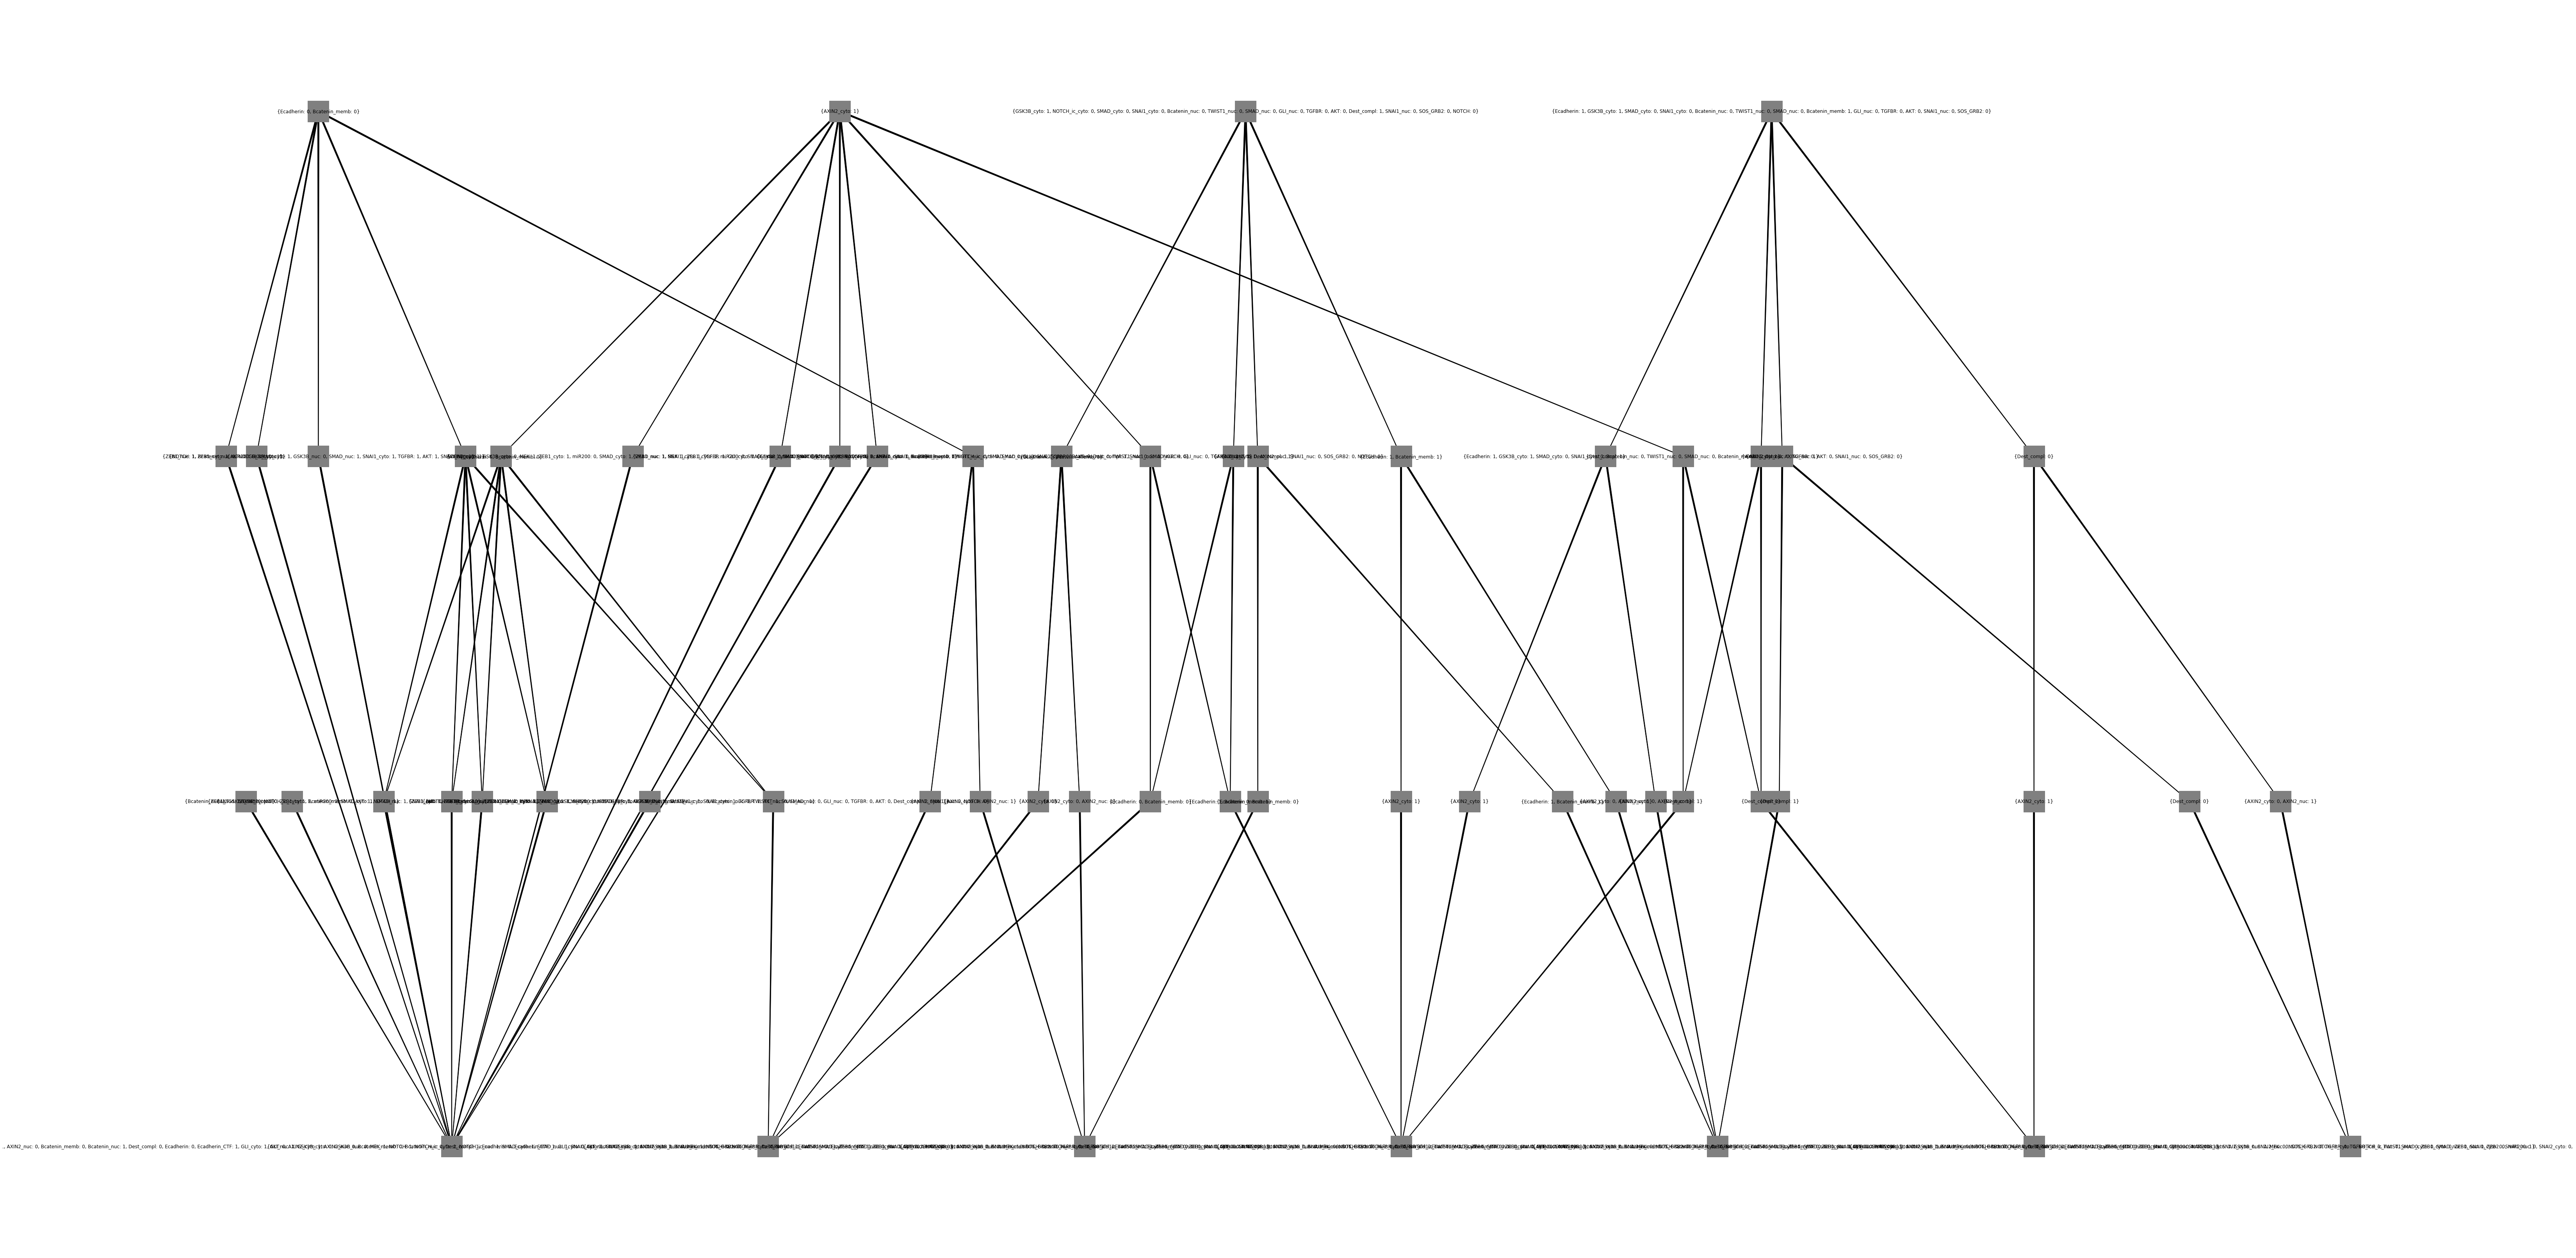

In [17]:
ex.plot_nx_succession_diagram(GM)

In case we only need the set of unique stable motifs:

In [18]:
motif_set=ex.get_motif_set(ar)

### Plotting with yED

Plotting the succession diagrams in matplolib is an quick and efficient way of having a glimpse at the succession diagram, however in the case of large and more complex diagrams this can become inefficient. We suggest exporting the diagrams and plotting them with tools such as yED. Here we explain how to do it:
* first, we export the succession diagram into graphml format. The attributes such as the label are preserved by the format

In [19]:
ex.save_to_graphml(GM,model_name='EMT30_M_succ_diagram_')

* next, open the saved graphml in yED
* go to Edit -> Properties Mapper
* (optional) in the top left corner of the pop-up window click *import additional configuration* and select the *succession_diagram_yED_properties.cnfx* config file from GitHub. 
* Set up the configuration and click *Apply*
* Finally, we suggest a hierarchical layout. To get this go to Layout -> Hierarchical

## Controlling Attractors

There are several different algorithms and heuristics that can help determine what is the minimum set of nonredundant nodes that need to be fixed in order to make the system reach a desired state _from any other state_. The target state can be a subset of the nodes as well.

The _reprogram_trap_spaces()_ function handles all the implemented control methods. Its inputs are the target node states and the method combinations. Here we give and example for the default _history + internal_ method. Please consult the documentation for the other methods.  

_history + internal_ :
Finds all shortest stable motif histories that result in the target node states being logically fixed. Each stable motif is searched for internal driver nodes. The resulting internal drivers are combined into a single  control set. The returned list consists of all such control sets for all stable motif histories. Each control set eventually becomes self-sustaining.



In [20]:
def spontaneous_control_set_lock_in_probability(control_sets,N):
    #assuming the opposite state of the control set is realized
    return sum([(N)**(-len(cs)) for cs in  control_sets])


def initial_setup_control_set_prob(control_sets):
    return sum([2**(-len(cs)) for cs in  control_sets])


In [21]:
target_state={'AKT': 1, 'AXIN2_cyto': 1, 'AXIN2_nuc': 0, 'Bcatenin_memb': 0, 'Bcatenin_nuc': 1, 'Dest_compl': 0, 'Ecadherin': 0, 'Ecadherin_CTF': 1, 'GLI_cyto': 1, 'GLI_nuc': 1, 'GSK3B_cyto': 0, 'GSK3B_nuc': 0, 'MEK': 1, 'NOTCH': 1, 'NOTCH_ic_cyto': 1, 'NOTCH_ic_nuc': 1, 'SMAD_cyto': 1, 'SMAD_nuc': 1, 'SNAI1_cyto': 1, 'SNAI1_nuc': 1, 'SNAI2_cyto': 1, 'SNAI2_nuc': 1, 'SOS_GRB2': 0, 'TGFBR': 1, 'TGFBR_icd': 1, 'TWIST1_nuc': 1, 'ZEB1_cyto': 1, 'ZEB1_nuc': 1, 'ZEB2': 1, 'miR200': 0}
#target_state={'AKT': 0, 'AXIN2_cyto': 0, 'AXIN2_nuc': 1, 'Bcatenin_memb': 1, 'Bcatenin_nuc': 0, 'Dest_compl': 1, 'Ecadherin': 1, 'Ecadherin_CTF': 0, 'GLI_cyto': 0, 'GLI_nuc': 0, 'GSK3B_cyto': 1, 'GSK3B_nuc': 1, 'MEK': 0, 'NOTCH': 0, 'NOTCH_ic_cyto': 0, 'NOTCH_ic_nuc': 0, 'SMAD_cyto': 0, 'SMAD_nuc': 0, 'SNAI1_cyto': 0, 'SNAI1_nuc': 0, 'SNAI2_cyto': 0, 'SNAI2_nuc': 0, 'SOS_GRB2': 0, 'TGFBR': 0, 'TGFBR_icd': 0, 'TWIST1_nuc': 0, 'ZEB1_cyto': 0, 'ZEB1_nuc': 0, 'ZEB2': 0, 'miR200': 1}
control_sets=ar.succession_diagram.reprogram_to_trap_spaces(logically_fixed=target_state,
                                               target_method='merge',
                                               driver_method='minimal')
print(control_sets)
print(spontaneous_control_set_lock_in_probability(control_sets,len(primes)))

[{'SMAD_nuc': 1}, {'GLI_nuc': 1}, {'SOS_GRB2': 1}, {'GSK3B_cyto': 0}, {'AKT': 1}, {'Bcatenin_nuc': 1}]
0.19999999999999998


In [22]:
target_state={'AKT': 0, 'AXIN2_cyto': 0, 'AXIN2_nuc': 1, 'Bcatenin_memb': 1, 'Bcatenin_nuc': 0, 'Dest_compl': 1, 'Ecadherin': 1, 'Ecadherin_CTF': 0, 'GLI_cyto': 0, 'GLI_nuc': 0, 'GSK3B_cyto': 1, 'GSK3B_nuc': 1, 'MEK': 0, 'NOTCH': 0, 'NOTCH_ic_cyto': 0, 'NOTCH_ic_nuc': 0, 'SMAD_cyto': 0, 'SMAD_nuc': 0, 'SNAI1_cyto': 0, 'SNAI1_nuc': 0, 'SNAI2_cyto': 0, 'SNAI2_nuc': 0, 'SOS_GRB2': 0, 'TGFBR': 0, 'TGFBR_icd': 0, 'TWIST1_nuc': 0, 'ZEB1_cyto': 0, 'ZEB1_nuc': 0, 'ZEB2': 0, 'miR200': 1}
control_sets=ar.succession_diagram.reprogram_to_trap_spaces(logically_fixed=target_state,
                                               target_method='history',
                                               driver_method='minimal')
print(control_sets)
print(spontaneous_control_set_lock_in_probability(control_sets,len(primes)))

[[[{'SMAD_nuc': 0, 'AKT': 0, 'Dest_compl': 1, 'Bcatenin_memb': 1}, {'SMAD_nuc': 0, 'NOTCH_ic_cyto': 0, 'AKT': 0, 'Dest_compl': 1}, {'SMAD_nuc': 0, 'NOTCH': 0, 'AKT': 0, 'Dest_compl': 1}, {'SMAD_nuc': 0, 'AKT': 0, 'Bcatenin_nuc': 0, 'Dest_compl': 1}, {'GLI_nuc': 0, 'AKT': 0, 'Dest_compl': 1, 'Bcatenin_memb': 1}, {'GLI_nuc': 0, 'NOTCH_ic_cyto': 0, 'AKT': 0, 'Dest_compl': 1}, {'GLI_nuc': 0, 'NOTCH': 0, 'AKT': 0, 'Dest_compl': 1}, {'GLI_nuc': 0, 'AKT': 0, 'Bcatenin_nuc': 0, 'Dest_compl': 1}, {'TGFBR': 0, 'GSK3B_cyto': 1, 'Dest_compl': 1, 'Bcatenin_memb': 1}, {'TGFBR': 0, 'AKT': 0, 'Dest_compl': 1, 'Bcatenin_memb': 1}, {'TGFBR': 0, 'NOTCH_ic_cyto': 0, 'GSK3B_cyto': 1, 'Dest_compl': 1}, {'TGFBR': 0, 'NOTCH_ic_cyto': 0, 'AKT': 0, 'Dest_compl': 1}, {'TGFBR': 0, 'GSK3B_cyto': 1, 'NOTCH': 0, 'Dest_compl': 1}, {'TGFBR': 0, 'GSK3B_cyto': 1, 'Bcatenin_nuc': 0, 'Dest_compl': 1}, {'TGFBR': 0, 'NOTCH': 0, 'AKT': 0, 'Dest_compl': 1}, {'TGFBR': 0, 'AKT': 0, 'Bcatenin_nuc': 0, 'Dest_compl': 1}, {'SMAD_cy

Please consult the function docstring for more information (by pressing Shift+Tab when the cursor is in the function or by running ar.succession_diagram.reprogram_to_trap_spaces?)


In [23]:
ar.succession_diagram.reprogram_to_trap_spaces?

In [ ]:

control_methods=[('history', 'internal'),
#('history', 'minimal'),
#('history', 'GRASP'),
('merge','internal'),
('merge', 'minimal')]
#('merge', 'GRASP')]
M_state={'AKT': 1, 'AXIN2_cyto': 1, 'AXIN2_nuc': 0, 'Bcatenin_memb': 0, 'Bcatenin_nuc': 1, 'Dest_compl': 0, 'Ecadherin': 0, 'Ecadherin_CTF': 1, 'GLI_cyto': 1, 'GLI_nuc': 1, 'GSK3B_cyto': 0, 'GSK3B_nuc': 0, 'MEK': 1, 'NOTCH': 1, 'NOTCH_ic_cyto': 1, 'NOTCH_ic_nuc': 1, 'SMAD_cyto': 1, 'SMAD_nuc': 1, 'SNAI1_cyto': 1, 'SNAI1_nuc': 1, 'SNAI2_cyto': 1, 'SNAI2_nuc': 1, 'SOS_GRB2': 0, 'TGFBR': 1, 'TGFBR_icd': 1, 'TWIST1_nuc': 1, 'ZEB1_cyto': 1, 'ZEB1_nuc': 1, 'ZEB2': 1, 'miR200': 0}
E_state={'AKT': 0, 'AXIN2_cyto': 0, 'AXIN2_nuc': 1, 'Bcatenin_memb': 1, 'Bcatenin_nuc': 0, 'Dest_compl': 1, 'Ecadherin': 1, 'Ecadherin_CTF': 0, 'GLI_cyto': 0, 'GLI_nuc': 0, 'GSK3B_cyto': 1, 'GSK3B_nuc': 1, 'MEK': 0, 'NOTCH': 0, 'NOTCH_ic_cyto': 0, 'NOTCH_ic_nuc': 0, 'SMAD_cyto': 0, 'SMAD_nuc': 0, 'SNAI1_cyto': 0, 'SNAI1_nuc': 0, 'SNAI2_cyto': 0, 'SNAI2_nuc': 0, 'SOS_GRB2': 0, 'TGFBR': 0, 'TGFBR_icd': 0, 'TWIST1_nuc': 0, 'ZEB1_cyto': 0, 'ZEB1_nuc': 0, 'ZEB2': 0, 'miR200': 1}
summary=[]
for target_method, driver_method in control_methods:
    print(target_method,driver_method)
    control_sets_M=ar.succession_diagram.reprogram_to_trap_spaces(logically_fixed=M_state,
                                               target_method=target_method,
                                               driver_method=driver_method)
    p_M=spontaneous_control_set_lock_in_probability(control_sets_M,len(primes))
    p_init_M=initial_setup_control_set_prob(control_sets_M)
    control_sets_E=ar.succession_diagram.reprogram_to_trap_spaces(logically_fixed=E_state,
                                               target_method=target_method,
                                               driver_method=driver_method)
    p_E=spontaneous_control_set_lock_in_probability(control_sets_E,len(primes))
    p_init_E=initial_setup_control_set_prob(control_sets_E)

    summary.append([target_method,driver_method,p_M,p_E,p_init_M,p_init_E])
    

history internal
merge internal
merge minimal


In [ ]:
import pandas as pd

df=pd.DataFrame(summary, columns=['target_method','driver_method','p_M','p_E','p_init_M','p_init_E'])
df.to_excel('EMT30_control_probabilities.xlsx')
df

In [ ]:
control_sets_E

In [ ]:
control_sets_M